# Demos for analyzing World Color Survey (WCS)

COG 260: Data, Computation, and The Mind (Yang Xu)

Data source: http://www1.icsi.berkeley.edu/wcs/data.html

______________________________________________

Import helper function file for WCS data analysis.

In [360]:
from wcs_helper_functions import *

Import relevant Python libraries.

In [361]:
import numpy as np
from scipy import stats
from random import random
%matplotlib inline

## Demo 1: Import stimulus (color chip) information in [Munsell space](https://en.wikipedia.org/wiki/Munsell_color_system)

> Stimuli were 330 color chips in Munsell space, each defined along lightness and hue dimensions.

> Each color chip has an index _(from 1 to 330)_ and a coordinate (lightness *(alphabet)*, hue *(integer)*).

In the following section, you will learn how to convert from **(a) index to coordinate** and **(b) coordinate to index**.

______________________________________________

Load chip information in Munsell space. 

`munsellInfo` is a 2-element tuple with dictionary elements.

In [362]:
munsellInfo = readChipData('./WCS_data_core/chip.txt');

### (a) Index &rarr; Coordinate

Access the second dictionary in `munsellInfo`.

In [363]:
indexCoord = munsellInfo[1]

`indexCoord` is a dictionary with **index _(key)_ &rarr; coordinate _(value)_** pairs. For example, to retrieve the Munsell coordinate _(lightness, hue)_ for chip with numerical index 1:

In [364]:
print(indexCoord[1])

('E', '29')


You can also uncomment the following to display full stimulus information (long).

In [365]:
# print(indexCoord)

### (b) Coordinate &rarr; Index

Access the first dictionary in `munsellInfo`.

In [366]:
coordIndex = munsellInfo[0]

`coordIndex` is a dictionary with **coordinate _(key)_ &rarr; index _(value)_** pairs. For example, to access numerical index for the color chip at Munsell coordinate _(D, 11)_:

In [367]:
print(coordIndex['D11'])

258


You can also uncomment the following to display full stimulus information (long).

In [368]:
# print(coordIndex)

## Demo 2: Import stimulus information in [CIELAB space](https://en.wikipedia.org/wiki/Lab_color_space)

> Each of the 330 stimuli can also be mapped to the 3D CIELAB space, where the dimensions are `l` _(lightness)_, `a`, & `b` _(color opponency)_.

> CIELAB Coordinates have a **one-to-one** correspondence with Munsell index, which ranges from 1 to 330.

______________________________________________

Load chip coordinates in CIELAB. 

`cielabCoord` is a dictionary with **index _(key)_ &rarr; CIELAB Coordinate _(value)_** pairs.

In [369]:
cielabCoord = readClabData('./WCS_data_core/cnum-vhcm-lab-new.txt')

For example, to obtain the CIELAB coordinates for chip with numerical index 1:

In [370]:
print(cielabCoord[1])

('61.70', '-4.52', '-39.18')


## Demo 3: Import color naming data
    
> Each of the 330 color chips was named by speakers of 110 different languages.

______________________________________________

Load naming data. 

`namingData` is a hierarchical dictionary organized as follows:

**language _(1 - 110)_ &rarr; speaker _(1 - *range varies per language*)_ &rarr; chip index _(1 - 330)_ &rarr; color term**

In [371]:
namingData = readNamingData('./WCS_data_core/term.txt')

For example, to obtain naming data from language 1 and speaker 1 for all 330 color chips:

In [372]:
namingData[1][4]; # remove semicolon to see data in full

For example, to see how many speakers language 1 has:

In [373]:
len(namingData[1])

25

## Demo 4: Import color foci data
    
> Apart from naming the color chips, each speaker also pointed to foci color chips for each color term they had used.

> **Note**: A single color term may have multiple foci locations.

______________________________________________

Load foci data. 

`fociData` is a hierarchical dictionary organized as follows: 

**language _(1 - 110)_ &rarr; speaker _(1 - *range varies per language*)_ &rarr; color term &rarr; foci coordinates**

In [374]:
fociData = readFociData('./WCS_data_core/foci-exp.txt');

For example, to obtain foci data for language 1 and speaker 1, where each entry shows foci locations for given term: 

In [375]:
fociData[86][2]

{'FS': ['G:1', 'G:2', 'G:3'],
 'FE': ['C:8', 'C:9', 'C:10'],
 'CA': ['F:19', 'F:20', 'F:21', 'G:19', 'G:20', 'G:21'],
 'AS': ['C:4', 'C:5', 'C:6'],
 'MA': ['E:38', 'E:39', 'E:40']}

In the above example, foci for term 'LF' is located at coordinate _(A, 0)_ in the Munsell chart.

## Demo 5: Import speaker demographic information

> Most speakers' age _(integer)_ and gender _(M/F)_ information was recorded.

______________________________________________

Load speaker information.

`speakerInfo` is a hierarchical dictionary organized as follows:

**language &rarr; speaker &rarr; (age, gender)**

In [376]:
speakerInfo = readSpeakerData('./WCS_data_core/spkr-lsas.txt')

For example, uncomment the following line to access _(age, gender)_ information for all speakers from language 1:

In [399]:
maleSpeakerArray = []
femaleSpeakerArray = []
termsChipsRatio = np.zeros((111, 111))
for language in range(1,len(speakerInfo)+1):
    for speaker in range(1,len(speakerInfo[language])+1):
        chipsShown = 0
        try:
            for key in fociData[language][speaker].keys():
                chipsShown += len(fociData[language][speaker][key])
            termsChipsRatio[language][speaker] = np.divide(len(fociData[language][speaker].keys()), chipsShown) 
            if speakerInfo[language][speaker][0][1] == 'M':
                appendString = [language, speaker, termsChipsRatio[language][speaker]]
                maleSpeakerArray.append(appendString)
            elif speakerInfo[language][speaker][0][1] == 'F':
                appendString = [language, speaker, termsChipsRatio[language][speaker]]
                femaleSpeakerArray.append(appendString)
        except:
            print(language, speaker)
            pass

#print(len(femaleSpeakerArray))
#print(len(maleSpeakerArray))
#print(len(maleSpeakerArray)+ len(femaleSpeakerArray))

fsum = 0
fratios = []
mratios = []
for speaker in femaleSpeakerArray:
    fsum += speaker[2]
    fratios.append(speaker[2])
favg = np.divide(fsum, len(femaleSpeakerArray))
msum = 0
for speaker in maleSpeakerArray:
    msum += speaker[2]
    mratios.append(speaker[2])
mavg = np.divide(msum, len(maleSpeakerArray))

maleStdDevArray = np.std(mratios)
femaleStdDevArray = np.std(fratios)

#print(mavg)

maleLanguageAvgRatioArray = []
languageSum = 0
count = 0
currLanguage = 1
maleLanguageAvgRatio = 0
for speaker in maleSpeakerArray:
    if speaker[0] == currLanguage:
        languageSum += speaker[2]
        count += 1        
    else:
        maleLanguageAvgRatio = languageSum / count
        maleLanguageAvgRatioArray.append(maleLanguageAvgRatio)
        count = 0
        languageSum = 0
        currLanguage = speaker[0]
        languageSum += speaker[2]
        count += 1
        
femaleLanguageAvgRatioArray = []
femaleLanguageSum = 0
femaleCount = 0
femaleCurrLanguage = 1
femaleLanguageAvgRatio = 0
for index in range(len(femaleSpeakerArray)):
    if speaker[index][0] == femaleCurrLanguage:
        femaleLanguageSum += speaker[index][2]
        femaleCount += 1
    elif index == len(femaleSpeakerArray):
        femaleLanguageAvgRatio = femaleLanguageSum / femaleCount
        femaleLanguageAvgRatioArray.append(femaleLanguageAvgRatio)    
    else:
        femaleLanguageAvgRatio = femaleLanguageSum / femaleCount
        femaleLanguageAvgRatioArray.append(femaleLanguageAvgRatio)
        femaleCount = 0
        femaleLanguageSum = 0
        femaleCurrLanguage = speaker[index][0]
        femaleLanguageSum += speaker[index][2]
        femaleCount += 1
#TODO for lnguages with only one male/female speaker, they are not appended into any average. FIX THAT

9 16
25 2
25 3
25 4
25 5
25 7
25 15
25 16
25 18
25 20
25 21
25 24
25 25
27 2
27 3
31 19
31 20
31 21
31 22
31 23
31 24
31 25
32 1
32 6
32 11
32 14
37 10
37 11
37 12
37 13
37 14
37 15
37 16
37 17
37 18
37 19
37 20
37 21
37 22
37 23
37 24
37 25
60 12
61 15
81 22
82 20
83 14
88 25
91 2
97 13
109 19
1 0.6561111111111111
2 0.95128367003367
3 0.7669994879672298
4 0.4645086224971784
5 0.5833333333333334
6 0.8445493900039356
7 0.8479166666666665
8 1.0
9 0.9082539682539683
10 0.6394826870141995
11 0.9320987654320988
12 0.7367539065434602
13 0.8999202551834131
14 1.0
15 0.9928571428571429
16 0.9277777777777777
17 0.4851791986011323
18 0.3709628365974847
19 0.9947916666666666
20 0.7809174952032095
21 1.0
22 0.7095749488606631
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 0.9897435897435898
29 1.0
30 0.9629629629629629
31 0.9444444444444444
32 0.06688460778359105
33 1.0
34 0.9925925925925926
35 1.0
36 1.0
37 0.9821428571428571
38 0.8827136752136753
39 0.9821428571428572
40 0.9886363636363636
41 0.574435151

For example, uncomment the following line to access _(age, gender)_ information for speaker 1 from language 1:

In [378]:
 for language in range(1,len(speakerInfo)):
     for speaker in range(1,len(speakerInfo[language])):
         if(len(speakerInfo[language][speaker]) > 1):
             print("bad news")
 speakerInfo[1][1]

[('90', 'M')]

In [379]:
mpermutations = []
jumble_mspeakers = maleSpeakerArray
fpermutations = []
jumble_fspeakers = femaleSpeakerArray
for x in range (0, 1000):
    np.random.seed(x)
    np.random.shuffle(jumble_fspeakers)
    fspeaker_words = np.zeros(len(jumble_fspeakers))
    for i in range (0, len(jumble_fspeakers)):
        fspeaker_words[i] = jumble_fspeakers[x][2]
        
    fpermutations.append(np.divide(np.sum(fspeaker_words), 1000))
for x in range (0, 1000):
    np.random.seed(x)
    np.random.shuffle(jumble_mspeakers)
    mspeaker_words = np.zeros(len(jumble_mspeakers))
    for i in range (0, len(jumble_mspeakers)):
        mspeaker_words[i] = jumble_mspeakers[x][2]
        
    mpermutations.append(np.divide(np.sum(mspeaker_words), 1000))
print(len(fpermutations))
print(np.average(mpermutations))
print(mpermutations[345:355])
print(mavg)
mcount = 0
for x in mpermutations:
    if (x <= mavg):
        mcount += 1
mp_value = mcount/len(maleSpeakerArray)

fcount = 0
for x in fpermutations:
    if (x <= favg):
        fcount += 1
fp_value = fcount/len(femaleSpeakerArray)


print(fp_value, mp_value)

stats.ttest_ind(mpermutations, fpermutations)


1000
1.1218644005077867
[0.05941353383458646, 0.194311475409836, 1.152375, 1.197272727272727, 0.911769230769231, 1.317, 1.317, 1.317, 1.317, 1.317]
0.8551588493828858
0.1797752808988764 0.14123006833712984


Ttest_indResult(statistic=5.498756398843474, pvalue=4.315303551316803e-08)

## Demo 6: Visualize color naming from an individual speaker

> Naming patterns from a speaker can be visualized in the stimulus palette _(Munsell space)_.

______________________________________________

Extract an example speaker datum from an example language.

In [380]:
lg61_spk5 = namingData[61][5]

Extract color terms used by that speaker.

In [381]:
terms = lg61_spk5.values()

Encode the color terms into random numbers (for plotting purposes).

In [382]:
encoded_terms = map_array_to(terms, generate_random_values(terms))

Visualize the color naming pattern for that speaker&mdash;each color patch corresponds to extension of a color term. Color scheme is randomized, but the partition of the color space is invariant.

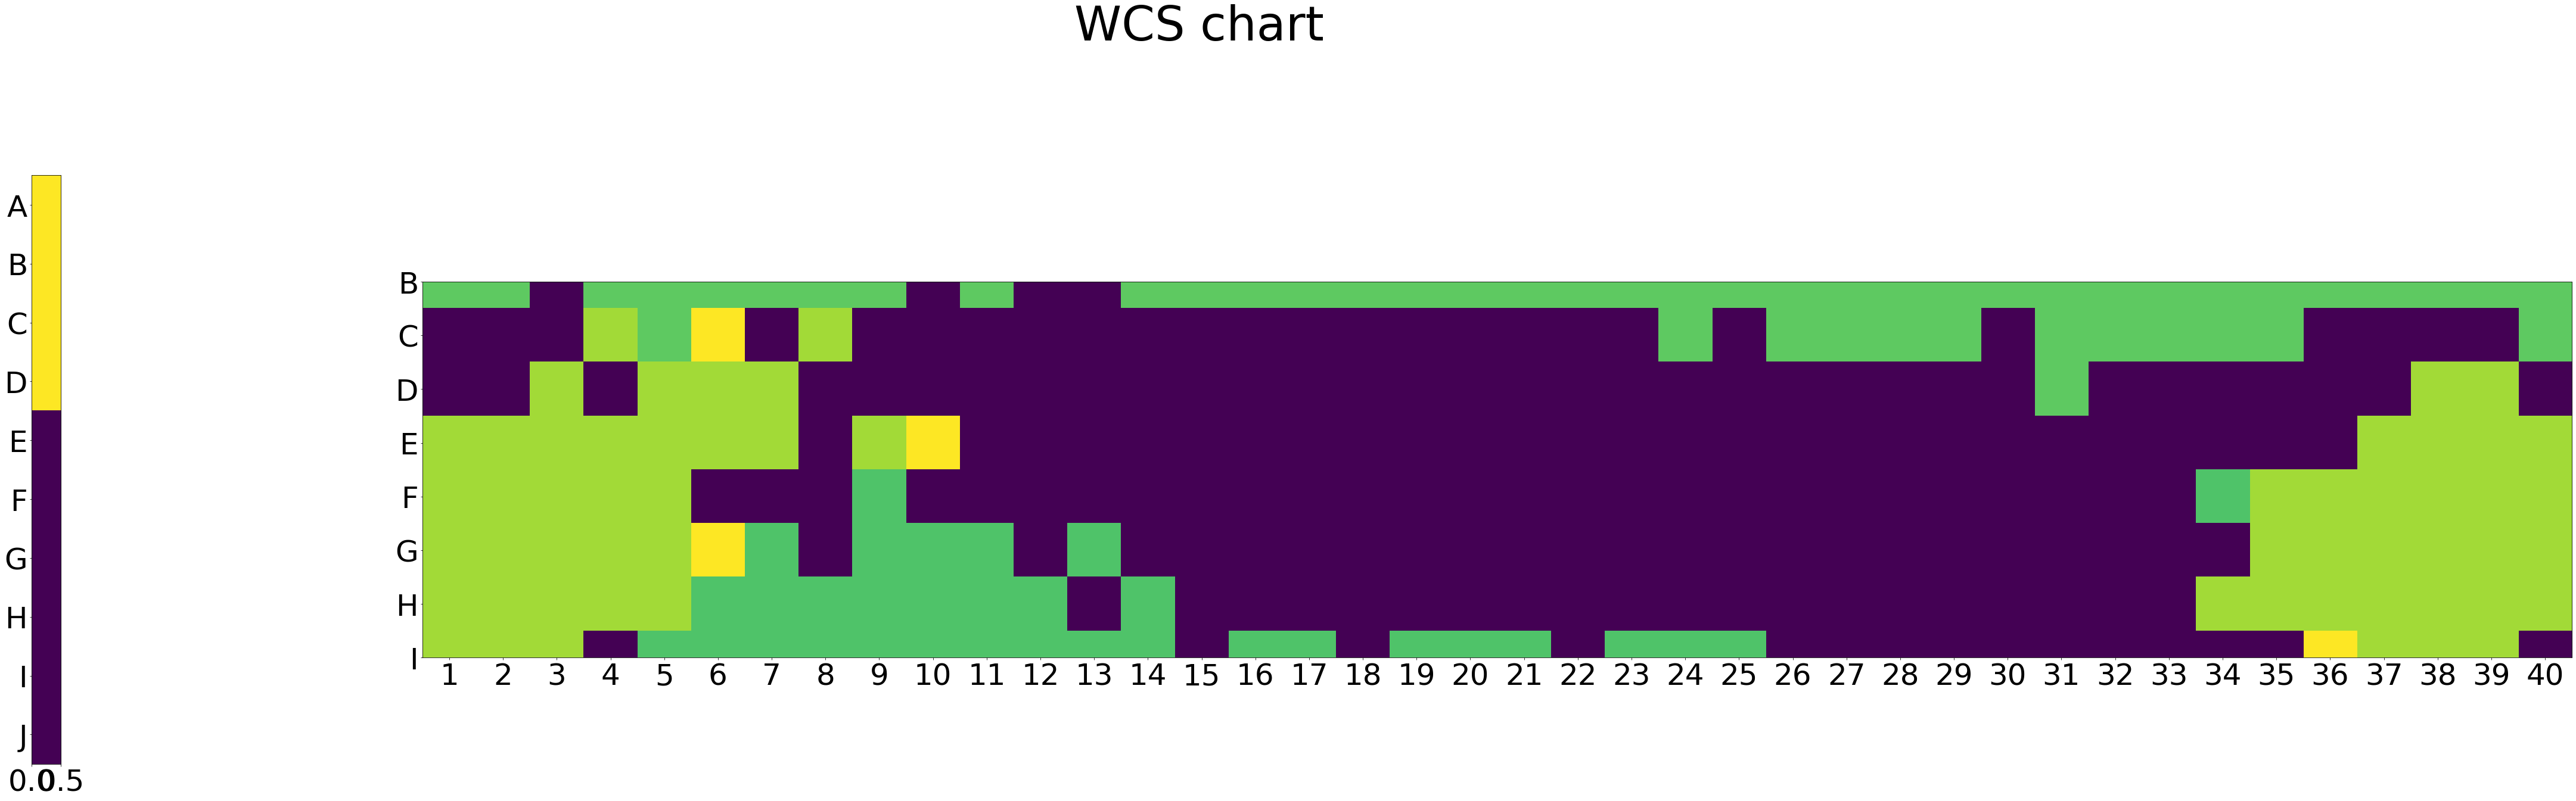

In [383]:
plotValues(encoded_terms)

**Note**: `plotValues()` is a generic function for visualizing various kinds of information on the chart, suited to needs.

Now you are in a position to start exploring this data set - enjoy!